In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

## Merging Holiday Dataframe with Aggregated Data

In [2]:
holiday_df_filtered = pd.read_csv('../data/holidays_in_india_2011_2017_filtered.csv')
holiday_df_filtered['Date'] = pd.to_datetime(holiday_df_filtered['Date'], format='%d-%m-%Y')

In [3]:
holiday_df_filtered.head(17)

,Date,Name,Weekday,Type
0,2011-01-01,New Year's Day,SATURDAY,Restricted Holiday
1,2011-01-05,Guru Govind Singh Jayanti,WEDNESDAY,Restricted Holiday
2,2011-01-15,Pongal,SATURDAY,Restricted Holiday
3,2011-01-26,Republic Day,WEDNESDAY,Gazetted Holiday
4,2011-02-14,Valentine's Day,MONDAY,Observance
5,2011-02-16,Milad un-Nabi/Id-e-Milad,WEDNESDAY,Gazetted Holiday
6,2011-02-19,Shivaji Jayanti,SATURDAY,Restricted Holiday
7,2011-03-02,Maha Shivaratri/Shivaratri,WEDNESDAY,Gazetted Holiday
8,2011-03-19,Holika Dahana,SATURDAY,Restricted Holiday
9,2011-03-20,Holi,SUNDAY,Gazetted Holiday


In [4]:
holiday_df_filtered_for_merge = holiday_df_filtered.drop(['Name', 'Weekday'], axis=1)
holiday_df_filtered_for_merge.head()

,Date,Type
0,2011-01-01,Restricted Holiday
1,2011-01-05,Restricted Holiday
2,2011-01-15,Restricted Holiday
3,2011-01-26,Gazetted Holiday
4,2011-02-14,Observance


In [5]:
aggregated_data = pd.read_csv('../data/aggregated_atm_data_with_weather_data.csv')
aggregated_data['Transaction Date'] = pd.to_datetime(aggregated_data['Transaction Date'], format='%Y-%m-%d')
aggregated_data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,...,23,6,16,70,0.1,1009,29,9,128,3
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,SATURDAY,C,...,23,6,16,70,0.1,1009,29,9,128,3


## Actual Merge Operation

<p> Left Outer Join is performed with left = ATM Data and right = Holidays Data on the Date columns because we want to retain all rows from the ATM Data and join rows only matching date is found in Holidays Data and otherwise the holiday columns can be left with NaN </p>

In [6]:
aggregated_data_with_holidays = aggregated_data.merge(right=holiday_df_filtered_for_merge, how='left', left_on='Transaction Date', right_on='Date')
aggregated_data_with_holidays.drop('Date', axis=1, inplace=True)

## Verifying whether number of rows before and after merge are the same

In [7]:
bs_data = aggregated_data[aggregated_data['ATM Name'] == 'Big Street ATM']
bs_data_holiday = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
print(len(bs_data))
print(len(bs_data_holiday))

2354
2354


## Filling in NaN values in Type Column with No Holiday value
Because Left Outer Join was performed, all unmatched dates will have NaN in Type column of new merged DataFrame

In [8]:
aggregated_data_with_holidays.fillna(value='No Holiday', inplace=True)

aggregated_data_with_holidays.head(10)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,SATURDAY,C,...,6,16,70,0.1,1009,29,9,128,3,Restricted Holiday
5,Big Street ATM,2011-01-02,17,5,12,52800,20900,31900,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
6,Mount Road ATM,2011-01-02,194,50,144,529300,171700,357600,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
7,Airport ATM,2011-01-02,67,53,14,268600,213300,55300,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
8,KK Nagar ATM,2011-01-02,260,155,105,809400,456200,353200,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday
9,Christ College ATM,2011-01-02,80,24,56,300000,95600,204400,SUNDAY,NH,...,7,18,69,0.0,1010,29,9,139,4,No Holiday


## Fixing Weekday
Applying the strftime('%A') function on each row of the data on the Date column will give the correct Weekday

In [9]:
aggregated_data_with_holidays['Weekday'] = aggregated_data_with_holidays.apply(lambda x: x['Transaction Date'].strftime('%A').upper(), axis=1)

## Verifying whether Fix was proper (check 2012-05-01 onwards which was a problem before)

In [10]:
bs_data = aggregated_data_with_holidays[aggregated_data_with_holidays['ATM Name'] == 'Big Street ATM']
bs_data[bs_data['Festival Religion'] == 'N']

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Type
125,Big Street ATM,2011-01-26,18,9,9,40500,22700,17800,WEDNESDAY,N,...,15,15,66,0.0,1014,30,9,85,10,Gazetted Holiday
515,Big Street ATM,2011-04-14,30,18,12,105600,59500,46100,THURSDAY,N,...,9,24,60,2.3,1010,36,10,202,6,Observance
600,Big Street ATM,2011-05-01,23,6,17,60200,19000,41200,SUNDAY,N,...,9,41,67,1.7,1009,37,7,238,6,Observance
1130,Big Street ATM,2011-08-15,4,4,0,29000,29000,0,MONDAY,N,...,14,36,75,4.5,1010,30,9,254,10,Gazetted Holiday
1370,Big Street ATM,2011-10-02,43,18,25,149000,63500,85500,SUNDAY,N,...,11,45,79,4.2,1011,30,6,258,7,Gazetted Holiday
1948,Big Street ATM,2012-01-26,33,15,18,137800,87400,50400,THURSDAY,N,...,12,0,48,0.0,1013,28,10,92,8,Gazetted Holiday
1953,Big Street ATM,2012-01-27,40,26,14,123100,88100,35000,FRIDAY,N,...,9,2,56,0.0,1013,29,10,110,6,No Holiday
2428,Big Street ATM,2012-05-01,34,6,28,154300,30000,124300,TUESDAY,N,...,15,24,71,0.7,1009,31,10,254,12,Observance
2433,Big Street ATM,2012-05-02,31,29,2,169800,169300,500,WEDNESDAY,N,...,13,23,70,5.5,1010,32,10,270,10,No Holiday
2438,Big Street ATM,2012-05-03,36,27,9,124300,106000,18300,THURSDAY,N,...,16,24,71,1.9,1009,33,10,266,12,No Holiday


## Adding Weekend as Holidays (only if they weren't marked as holidays before itself)

In [11]:
# aggregated_data_with_holidays['Type'] = aggregated_data_with_holidays.apply(lambda x: 
#                                                                             'Weekend' if x['Type'] == 'No Holiday' 
#                                                                             and x['Weekday'] in ['SATURDAY', 'SUNDAY'] 
#                                                                             else x['Type'], axis=1)


## Fixing Holiday Sequence and breaking it into three columns. Also Fixing Working Day and converting it to IsHoliday

<p> A day is a Holiday only if it is a Gazetted or Restricted Holiday </p>
<p> Weekends are not considered as holidays but they still get importance because of the IsWeekday column being stored as False for Weekends </p>
<p> Logic is, for each row in the dataframe, find yesterday's date and tomorrow's date, then check whether all three of them are holidays or not, by checking whether they are present in the holidays dataframe and thus get the overall sequence for a single day and append holiday status of each day to their respective lists which would end up becoming the three new isHoliday columns in the DataFrame </p>

In [12]:
all_holiday_dates = set(holiday_df_filtered['Date'])
holiday_sequence_list = []
today_holiday_list = []
yesterday_holiday_list = []
tomorrow_holiday_list = []
for i in range(len(aggregated_data_with_holidays)):
    # iloc[row_number_index, column_number_index]
    # Transaction Date is second column so its index is 1
    today_date = aggregated_data_with_holidays.iloc[i, 1]
    yesterday_date = today_date - timedelta(days=1)
    tomorrow_date = today_date + timedelta(days=1)
    
    # Hardcode Holiday Sequence for first and last days in dataset
    if today_date == datetime(2011, 1, 1):
        holiday_sequence = 'WHH'
        
    elif today_date == datetime(2017, 12, 31):
        holiday_sequence = 'HHH'
        
    # Else for today, yesterday and tomorrow check whether they are a holiday or a weekend date, if yes, append "H", else "W"
    else:
        holiday_sequence = ""
        for date in [yesterday_date, today_date, tomorrow_date]:
            # if (date in all_holiday_dates) or (date.strftime('%A') in ['Saturday', 'Sunday']):
            if date in all_holiday_dates:
                holiday_sequence += "H"
            else:
                holiday_sequence += "W"
    
    holiday_sequence_list.append(holiday_sequence)
    yesterday_holiday_list.append(True if holiday_sequence[0] == 'H' else False)
    today_holiday_list.append(True if holiday_sequence[1] == 'H' else False)
    tomorrow_holiday_list.append(True if holiday_sequence[2] == 'H' else False)

## Adding the Holiday Sequence column
I took a deepcopy of the previous DataFrame 

In [13]:
new_agg = aggregated_data_with_holidays.copy(deep=True)
new_agg['Holiday Sequence'] = holiday_sequence_list
new_agg['isYesterdayHoliday'] = yesterday_holiday_list
new_agg['isHoliday'] = today_holiday_list
new_agg['isTomorrowHoliday'] = tomorrow_holiday_list

In [14]:
bs_data = new_agg[new_agg['ATM Name'] == 'Big Street ATM']
bs_data[['Transaction Date', 'Holiday Sequence', 'Weekday', 'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday']][bs_data['Festival Religion'] == 'N'].head(10)

,Transaction Date,Holiday Sequence,Weekday,Type,isYesterdayHoliday,isHoliday,isTomorrowHoliday
125,2011-01-26,WHW,WEDNESDAY,Gazetted Holiday,False,True,False
515,2011-04-14,WHW,THURSDAY,Observance,False,True,False
600,2011-05-01,WHW,SUNDAY,Observance,False,True,False
1130,2011-08-15,WHW,MONDAY,Gazetted Holiday,False,True,False
1370,2011-10-02,WHW,SUNDAY,Gazetted Holiday,False,True,False
1948,2012-01-26,WHW,THURSDAY,Gazetted Holiday,False,True,False
1953,2012-01-27,HWW,FRIDAY,No Holiday,True,False,False
2428,2012-05-01,WHW,TUESDAY,Observance,False,True,False
2433,2012-05-02,HWW,WEDNESDAY,No Holiday,True,False,False
2438,2012-05-03,WWW,THURSDAY,No Holiday,False,False,False


Check 26th and 27th January 2012, they had wrong Holiday Sequences before but now its correct

## Generating Boolean columns for isYesterdayWeekday and isTomorrowWeekday

In [15]:
new_agg['isYesterdayWeekday'] = new_agg.apply(lambda x: (x['Transaction Date'] - timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isTomorrowWeekday'] = new_agg.apply(lambda x: (x['Transaction Date'] + timedelta(days=1)).strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)
new_agg['isWeekday'] = new_agg.apply(lambda x: x['Transaction Date'].strftime('%A') 
                                              not in ['Saturday', 'Sunday'], axis=1)

In [16]:
bs_data = new_agg[new_agg['ATM Name'] == 'Big Street ATM']
bs_data[['Transaction Date', 'Weekday', 'Type', 'isYesterdayWeekday', 'isWeekday', 'isTomorrowWeekday']].head(10)

,Transaction Date,Weekday,Type,isYesterdayWeekday,isWeekday,isTomorrowWeekday
0,2011-01-01,SATURDAY,Restricted Holiday,True,False,False
5,2011-01-02,SUNDAY,No Holiday,False,False,True
10,2011-01-03,MONDAY,No Holiday,False,True,True
15,2011-01-04,TUESDAY,No Holiday,True,True,True
20,2011-01-05,WEDNESDAY,Restricted Holiday,True,True,True
25,2011-01-06,THURSDAY,No Holiday,True,True,True
30,2011-01-07,FRIDAY,No Holiday,True,True,False
35,2011-01-08,SATURDAY,No Holiday,True,False,False
40,2011-01-09,SUNDAY,No Holiday,False,False,True
45,2011-01-10,MONDAY,No Holiday,False,True,True


## Checking for Correlation between new generated columns

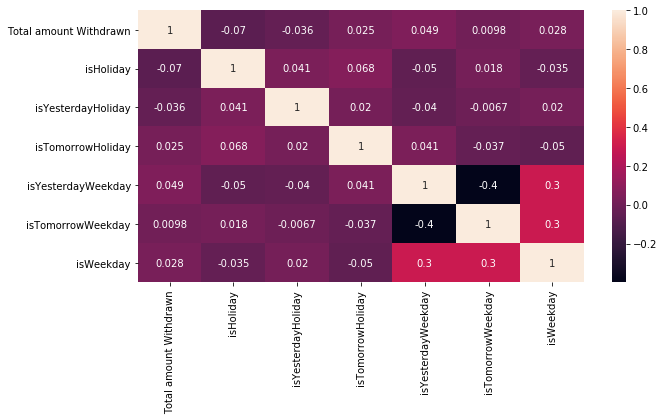

In [17]:
columns_required = ['Transaction Date', 'Total amount Withdrawn', 'Weekday', 'Type', 
                    'isHoliday', 'isYesterdayHoliday', 'isTomorrowHoliday', 'isYesterdayWeekday', 
                    'isTomorrowWeekday', 'isWeekday']

corr_atm_df = bs_data[columns_required]

plt.figure(figsize=(10, 5))
sns.heatmap(corr_atm_df.corr(), annot=True)

## Correlation

<p> (isYesterdayWeekday, isTomorrowWeekday) have slight negative correlation and (isWeekday, isYesterdayWeekday), (isWeekday, isTomorrowWeekday) have slight positive correlation </p>

<p> We're going to let this be for now because it is still only slight correlation </p>

In [18]:
new_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'Festival Religion',
       'Working Day', 'Holiday Sequence', 'maxtempC', 'mintempC', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Type',
       'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday'],
      dtype='object')

## Dropping Festival Religion, Holiday Sequence & Working Day Columns

In [19]:
new_agg.drop(['Festival Religion', 'Holiday Sequence', 'Working Day'], axis=1, inplace=True)

## Writing new csv

In [20]:
new_agg.to_csv('../data/aggregated_data_cleaning_complete.csv', index=False)

## Creating a new csv that already has all the unnecessary columns dropped and Rainfall Status column added

In [28]:
new_cleaned_agg = new_agg.copy(deep=True)

In [29]:
def rainfall_status_check(value):
    if value == 0:
        return "No Rain"
    elif value < 2.5:
        return "Light Rain"
    elif value <= 7.6:
        return "Moderate Rain"
    elif value <= 50:
        return "Heavy Rain"
    else:
        return "Violent Rain"

In [30]:
new_cleaned_agg['Rainfall Status'] = new_cleaned_agg['precipMM'].apply(rainfall_status_check)

In [31]:
new_cleaned_agg.columns

Index(['ATM Name', 'Transaction Date', 'No Of Withdrawals',
       'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
       'Total amount Withdrawn', 'Amount withdrawn XYZ Card',
       'Amount withdrawn Other Card', 'Weekday', 'maxtempC', 'mintempC',
       'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'Type', 'isYesterdayHoliday', 'isHoliday', 'isTomorrowHoliday',
       'isYesterdayWeekday', 'isTomorrowWeekday', 'isWeekday',
       'Rainfall Status'],
      dtype='object')

In [32]:
new_cleaned_agg.drop(['No Of Withdrawals', 'No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals',
                      'Amount withdrawn XYZ Card', 'Amount withdrawn Other Card', 
                      'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset',
                      'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 
                      'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 
                      'visibility', 'winddirDegree', 'windspeedKmph'], axis=1, inplace=True)

In [33]:
new_cleaned_agg.head()

,ATM Name,Transaction Date,Total amount Withdrawn,Weekday,Type,isYesterdayHoliday,isHoliday,isTomorrowHoliday,isYesterdayWeekday,isTomorrowWeekday,isWeekday,Rainfall Status
0,Big Street ATM,2011-01-01,123800,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
1,Mount Road ATM,2011-01-01,767900,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
2,Airport ATM,2011-01-01,503400,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
3,KK Nagar ATM,2011-01-01,945300,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain
4,Christ College ATM,2011-01-01,287700,SATURDAY,Restricted Holiday,False,True,True,True,False,False,Light Rain


In [34]:
new_cleaned_agg.to_csv('../data/cleaned_data.csv', index=False)